### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피 쳐 : Weight, Length
- 타 겟 : Species
- 유 형 : 지도학습 + 분류

(1) 모듈 로딩 & 데이터 준비

In [179]:
import pandas as pd                                    # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier     # 기계 학습 관련 모듈
import matplotlib.pyplot as plt

In [180]:
data_file = '../data/fish.csv'

In [181]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [182]:
# Bream, Smelt 품종 행만 추출
twofishDF = fishDF[fishDF['Species'].isin(['Bream','Smelt'])]  # Boolean Indexing

# 해당 행만 도출
twofishDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [183]:
twofishDF.reset_index(drop = True, inplace=True)
twofishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(2) 데이터 전처리

In [184]:
# Bream, Smelt를 수치화
# Bream => 0, Smelt => 1로 값 변환
# copy의 파라미터 : deep = True로 설정하면 깊은 복사
# 기본값 : deep = False -> 얕은 복사
# DF이기 때문에 행도 슬라이싱으로 지정해줘야 오류 발생 X
# 데이터프레임의 일부를 선택하면서 생성된 새로운 객체는 원본 데이터프레임의 뷰(view)이기 때문에 원본 데이터에 영향을 미칠 수 있ek.
twofishDF.loc[:,'Species'] = twofishDF['Species'].replace({'Bream':0,'Smelt':1}).copy()
twofishDF['Species'] = twofishDF['Species'].astype('int')

C:\Users\kdp\AppData\Local\Temp\ipykernel_2520\391154601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofishDF['Species'] = twofishDF['Species'].astype('int')


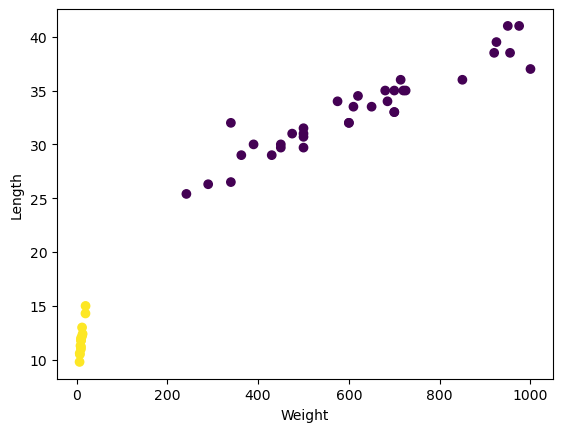

In [185]:
# Weight, Length로 품종 구별이 가능한지 시각화
plt.scatter(twofishDF['Weight'], twofishDF['Length'], c = twofishDF['Species'])
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(3) 기계학습을 위한 데이터 준비 
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋     : 80%
- 테스트용 데이터셋   : 20%

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비

In [186]:
# 데이터 섞기 => 100% 모두 섞기
twofishDF = twofishDF.sample(frac = 1.)
twofishDF

,Species,Weight,Length
10,0,475.0,31.0
45,1,13.4,12.4
14,0,600.0,32.0
32,0,925.0,39.5
4,0,430.0,29.0
43,1,9.8,12.0
39,1,9.8,11.2
11,0,500.0,31.0
44,1,12.2,12.2
8,0,450.0,30.0


In [187]:
# 학습과 테스트 비율 조절 갯수 계산
num = round(twofishDF.shape[0] * 0.8)

# 학습 데이터셋 추출
trainDF = twofishDF.iloc[:num+1]

# 테스트 데이터셋 추출
testDF = twofishDF.iloc[num+1:]
trainDF

,Species,Weight,Length
10,0,475.0,31.0
45,1,13.4,12.4
14,0,600.0,32.0
32,0,925.0,39.5
4,0,430.0,29.0
43,1,9.8,12.0
39,1,9.8,11.2
11,0,500.0,31.0
44,1,12.2,12.2
8,0,450.0,30.0


(3-2) scikit-learn 모듈 활용한 학습&테스트용 데이터셋 준비 
- 추가 모듈 로딩
- 비율 설정 없이 학습/테스트셋 분리
- [전달] 피쳐 데이터, 타겟 데이터
- [기본] shuffle = True, train:test = 0.75 : 0.25
- [설정] train:test = 0.8 : 0.2 => test_size, train_size 매개변수 값 설정
- 분류의 경우 target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정
- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟  

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
# 특성과 타겟 분리
featureDF = twofishDF[twofishDF.columns[1:]]
targetSR = twofishDF['Species']

In [190]:
# 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟  
# xTrain,xTest,yTrain,yTest = train_test_split(featureDF,targetSR)

In [191]:
# train : test = 0.8 : 0.2
# xTrain,xTest,yTrain,yTest = train_test_split(featureDF,targetSR, test_size = 0.2)
# xTrain,xTest,yTrain,yTest = train_test_split(featureDF,targetSR, train_size = 0.8) - 위와 동일 -> 둘 중 하나 사용

In [192]:
# target 비율 맞추기
xTrain,xTest,yTrain,yTest = train_test_split(featureDF,targetSR, test_size = 0.2, stratify=targetSR)

# target/클래스 비율 확인
yTrain.value_counts()/len(yTrain),yTest.value_counts()/len(yTest)

In [193]:
### 검증용 데이터셋 준비 -> 학습용 데이터셋에서 분리
xTrain,xVal,yTrain,yVal = train_test_split(xTrain,yTrain, test_size = 0.1, stratify=yTrain)

(4) 학습 진행
- 학습 방법 : 지도학습 + 분류 => KNN
- 모델 인스턴스 생성 => fit() 메서드

In [194]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [195]:
# 학습 진행 => 학습용 데이터로 진행
model.fit(xTrain,yTrain)

KNeighborsClassifier()

(5) 테스트 진행
- 학습에 사용되지 않은 데이터로 진행
- score() 메서드

In [196]:
model.score(xVal,yVal)

1.0

(6) 모델 활용 예측
- 새로운 데이터로 진행( 테스트용 데이터셋 )

In [197]:
model.predict(xTest)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [198]:
yTest

15    0
8     0
36    1
9     0
48    1
21    0
32    0
4     0
0     0
45    1
Name: Species, dtype: int32

(6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측
==> 학습할 때 전달되는 피쳐 형태와 동일한 데이터

In [202]:
# 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160,25]], columns=twofishDF.columns[1:])
new_data

,Weight,Length
0,160,25


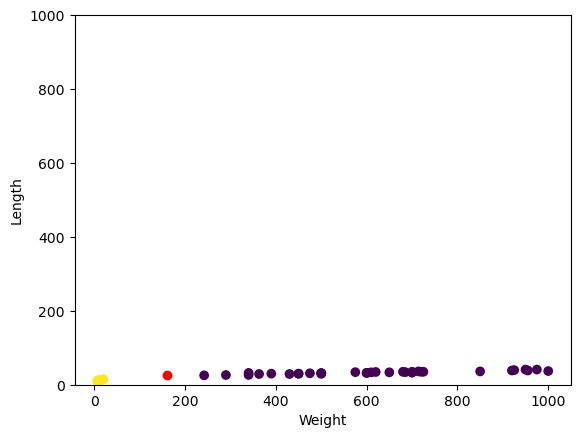

In [222]:
# 새로운 데이터와 학습 데이터의 시각화

plt.plot(new_data.Weight,new_data.Length,'ro')

# 학습 데이터 시각화
plt.scatter(twofishDF.Weight,twofishDF.Length,c = twofishDF.Species)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.ylim(0,1000)
plt.show()

In [215]:
# 생성된 모델로 새로운 데이터 품종 예측
model.predict(new_data)

array([1])

In [217]:
# 새로운 데이터의 최근접 데이터 추출
_, index = model.kneighbors(new_data) # 거리, 인덱스 반환
index = index.tolist()[0]

In [220]:
twofishDF.iloc[index]

,Species,Weight,Length
34,0,950.0,41.0
27,0,714.0,36.0
9,0,500.0,30.7
26,0,720.0,35.0
4,0,430.0,29.0


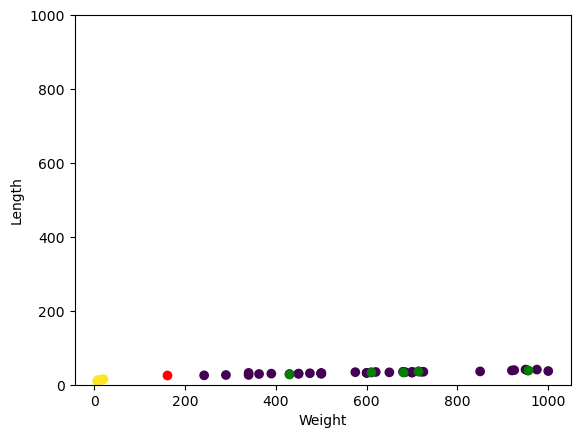

In [223]:
# 새로운 데이터와 학습 데이터의 시각화

plt.plot(new_data.Weight, new_data.Length, 'ro')

# 학습 데이터 시각화
plt.scatter(twofishDF.Weight, twofishDF.Length, c=twofishDF.Species)
plt.scatter(twofishDF.loc[index, 'Weight'], twofishDF.loc[index, 'Length'], color = 'green')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.ylim(0,1000)
plt.show()